<a href="https://colab.research.google.com/github/Guliko24/CF969_SU/blob/main/Assignment_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 55.1 MB/s eta 0:00:00


Assignment 1
Student ID:


TASK 1

IndexError: list index out of range

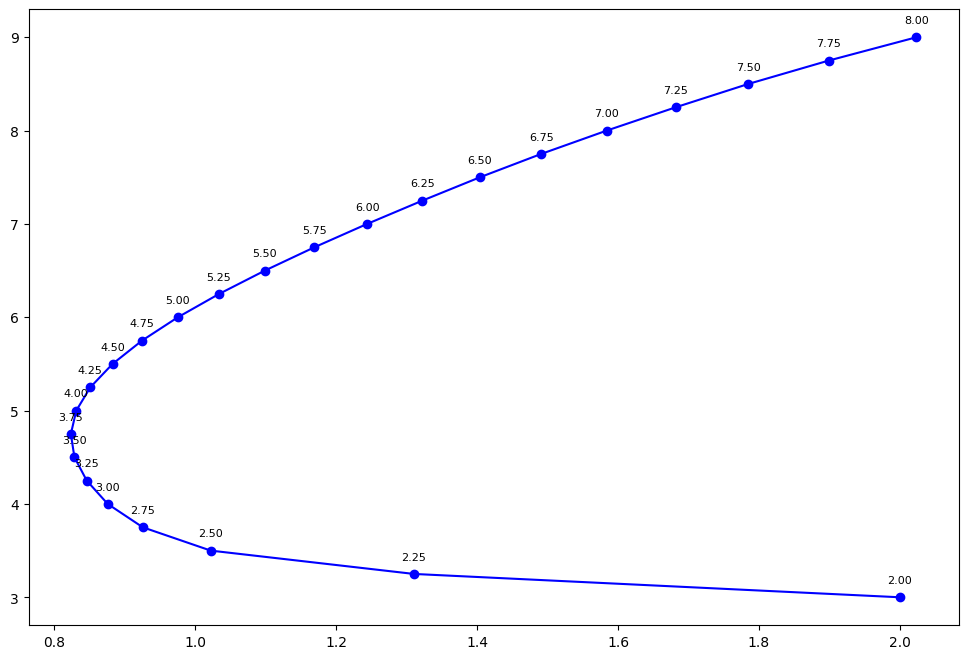

In [5]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Data generation as per the given code
n = 10
dig1 = 1 ## student ID digit
dig2 = 7  ##student ID digit

dummyrepetitions = 10*dig1+dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0,1)

Corr = np.array([[0]*n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)

ssigma = np.array([[0]*1 for _ in range(n)], dtype=float)
mmu = np.array([[0]*1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.diag(ssigma.flatten())
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5*(C2 + C2.T)

# Optimization function
def optimize_portfolio(returns, cov_matrix, target_return):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)  # Suppress Gurobi output

    x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")
    model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontier for the given r values
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values = []
mu_values = []

for r in r_values:
    weights, risk = optimize_portfolio(mmu.flatten(), C, r)
    if weights is not None:
        sigma = np.sqrt(risk)
        mu = np.dot(mmu.flatten(), weights)
        sigma_values.append(sigma)
        mu_values.append(mu)

# Plot the efficient frontier with labels
plt.figure(figsize=(12, 8))
plt.plot(sigma_values, mu_values, 'b-o')

# Add labels to each point
for i, r in enumerate(r_values):
    plt.annotate(f'{r:.2f}', (sigma_values[i], mu_values[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=8)

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontier')
plt.grid(True)

# Adjust the plot layout to prevent overlapping labels
plt.tight_layout()

plt.show()

# Print the results
print("σ values:")
print(sigma_values)
print("\nμ values:")
print(mu_values)
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values = []
mu_values = []

for r in r_values:
    weights, risk = optimize_portfolio(mmu.flatten(), C, r)
    if weights is not None:
        sigma = np.sqrt(risk)
        mu = np.dot(mmu.flatten(), weights)
        sigma_values.append(sigma)
        mu_values.append(mu)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, 'b-o')
plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Print the results
print("σ values:")
print(sigma_values)
print("\nμ values:")
print(mu_values)

In [6]:
# Print the results
print("σ values:")
print(sigma_values)
print("\nμ values:")
print(mu_values)

σ values:
[1.9999999999996432, 1.3104486945509999, 1.022063423394682, 0.9255649509538327, 0.8758282585748574, 0.8460796662223544, 0.8285826430950536, 0.823543999397893, 0.8311903326636969, 0.8511798558155415, 0.8826743750908133, 0.9244988294210843, 0.9753252003425144, 1.0338266464492858, 1.0987779352795537, 1.1691045696895699, 1.243895158903708, 1.322392515663478, 1.4040099471527132, 1.4909296868607123, 1.583890160268924, 1.6818896900453084, 1.784885082718667, 1.898811502790026, 2.023343769431494]

μ values:
[3.0, 3.250000000000173, 3.5000000000008082, 3.7500000000151537, 3.9999999999984412, 4.2500000000003535, 4.499999999999918, 4.749999999999945, 4.999999999999982, 5.2500000000000115, 5.50000000000001, 5.749999999999991, 6.000000000000001, 6.250000000000004, 6.499999999999998, 6.750000000000004, 7.000000000000011, 7.24999999999987, 7.499999999996389, 7.749999999999445, 8.000000000000062, 8.25000000000028, 8.50000000000064, 8.749999999999927, 8.99999999999346]


TASK 2


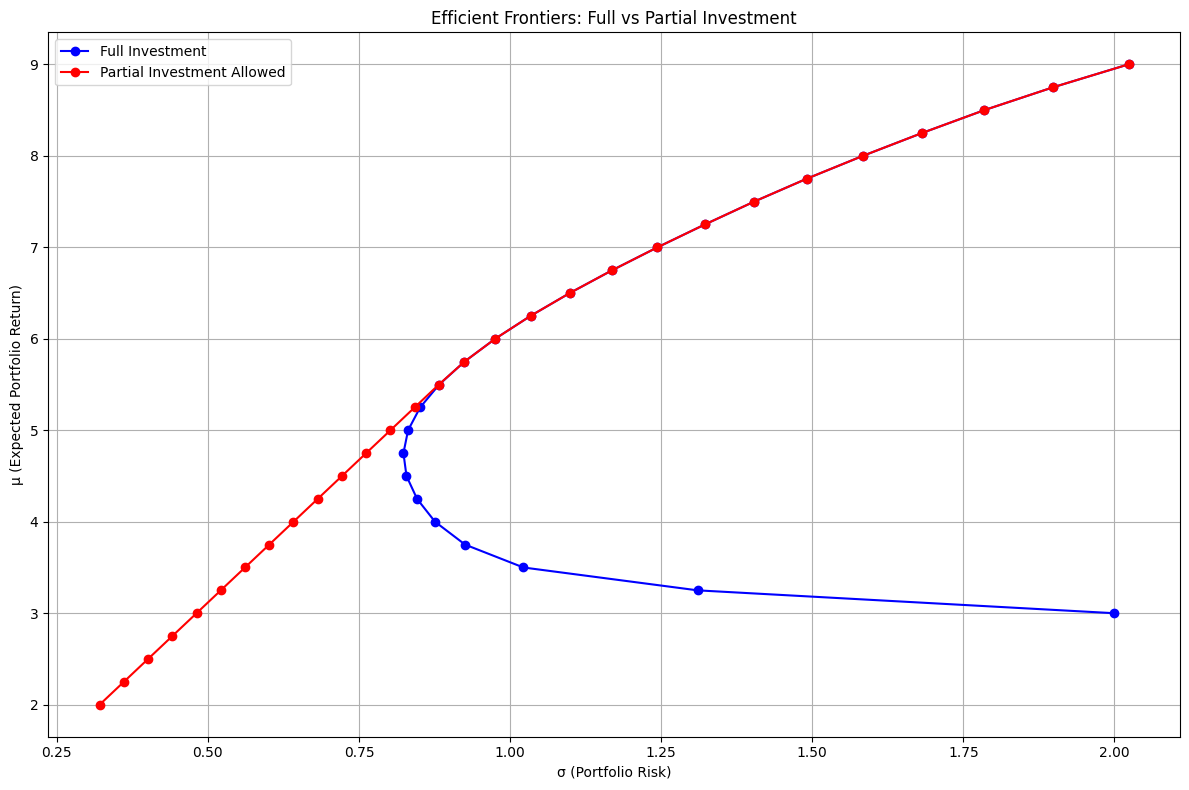

Full Investment σ values: [1.9999999999996432, 1.3104486945509999, 1.022063423394682, 0.9255649509538327, 0.8758282585748574, 0.8460796662223544, 0.8285826430950536, 0.823543999397893, 0.8311903326636969, 0.8511798558155415, 0.8826743750908133, 0.9244988294210843, 0.9753252003425144, 1.0338266464492858, 1.0987779352795537, 1.1691045696895699, 1.243895158903708, 1.322392515663478, 1.4040099471527132, 1.4909296868607123, 1.583890160268924, 1.6818896900453084, 1.784885082718667, 1.898811502790026, 2.023343769431494]
Full Investment μ values: [3.0, 3.250000000000173, 3.5000000000008082, 3.7500000000151537, 3.9999999999984412, 4.2500000000003535, 4.499999999999918, 4.749999999999945, 4.999999999999982, 5.2500000000000115, 5.50000000000001, 5.749999999999991, 6.000000000000001, 6.250000000000004, 6.499999999999998, 6.750000000000004, 7.000000000000011, 7.24999999999987, 7.499999999996389, 7.749999999999445, 8.000000000000062, 8.25000000000028, 8.50000000000064, 8.749999999999927, 8.999999999

In [7]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# ... [Keep the previous data generation code] ...

def optimize_portfolio(returns, cov_matrix, target_return, allow_partial_investment=False):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)

    x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")

    if allow_partial_investment:
        model.addConstr(gp.quicksum(x[i] for i in range(n)) <= 1, "investment")
    else:
        model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontiers for both cases
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values_full = []
mu_values_full = []
sigma_values_partial = []
mu_values_partial = []

for r in r_values:
    # Full investment
    weights_full, risk_full = optimize_portfolio(mmu.flatten(), C, r, False)
    if weights_full is not None:
        sigma_full = np.sqrt(risk_full)
        mu_full = np.dot(mmu.flatten(), weights_full)
        sigma_values_full.append(sigma_full)
        mu_values_full.append(mu_full)

    # Partial investment allowed
    weights_partial, risk_partial = optimize_portfolio(mmu.flatten(), C, r, True)
    if weights_partial is not None:
        sigma_partial = np.sqrt(risk_partial)
        mu_partial = np.dot(mmu.flatten(), weights_partial)
        sigma_values_partial.append(sigma_partial)
        mu_values_partial.append(mu_partial)

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(sigma_values_full, mu_values_full, 'b-o', label='Full Investment')
plt.plot(sigma_values_partial, mu_values_partial, 'r-o', label='Partial Investment Allowed')

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontiers: Full vs Partial Investment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Full Investment σ values:", sigma_values_full)
print("Full Investment μ values:", mu_values_full)
print("\nPartial Investment σ values:", sigma_values_partial)
print("Partial Investment μ values:", mu_values_partial)

Task 3

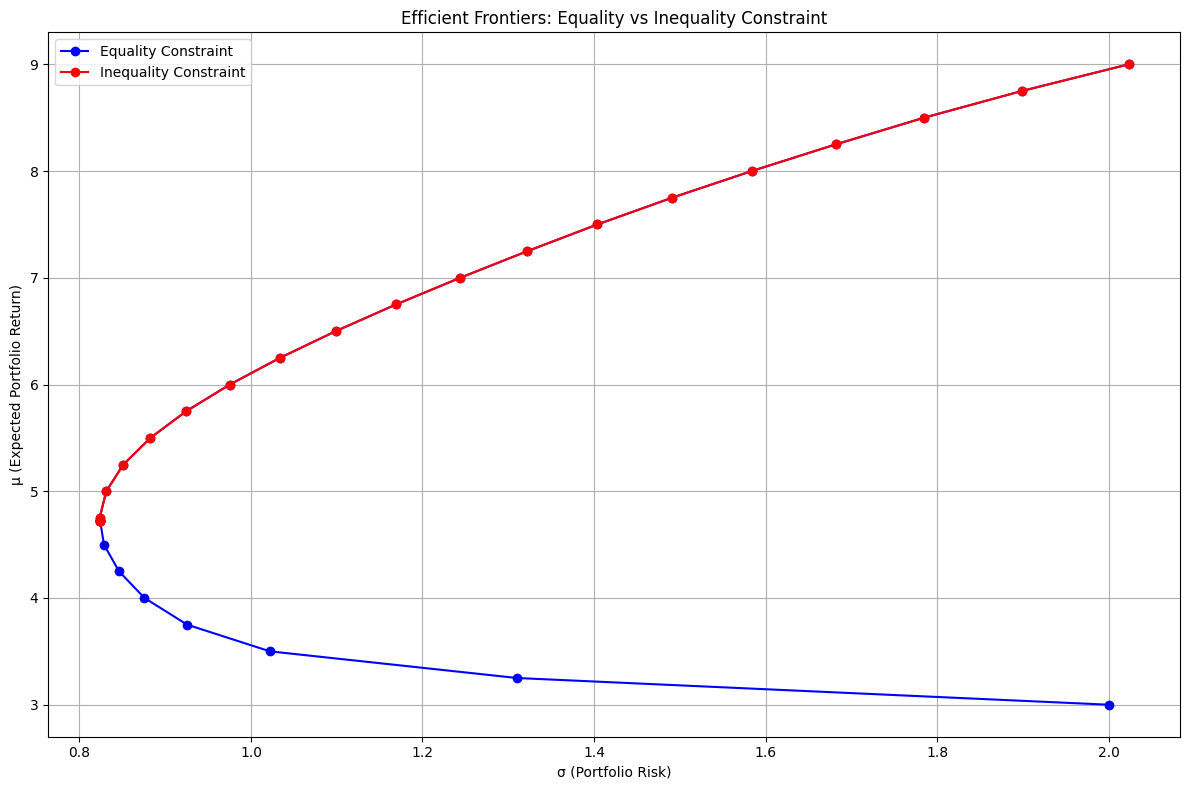

Equality Constraint σ values: [1.9999999999996432, 1.3104486945509999, 1.022063423394682, 0.9255649509538327, 0.8758282585748574, 0.8460796662223544, 0.8285826430950536, 0.823543999397893, 0.8311903326636969, 0.8511798558155415, 0.8826743750908133, 0.9244988294210843, 0.9753252003425144, 1.0338266464492858, 1.0987779352795537, 1.1691045696895699, 1.243895158903708, 1.322392515663478, 1.4040099471527132, 1.4909296868607123, 1.583890160268924, 1.6818896900453084, 1.784885082718667, 1.898811502790026, 2.023343769431494]
Equality Constraint μ values: [3.0, 3.250000000000173, 3.5000000000008082, 3.7500000000151537, 3.9999999999984412, 4.2500000000003535, 4.499999999999918, 4.749999999999945, 4.999999999999982, 5.2500000000000115, 5.50000000000001, 5.749999999999991, 6.000000000000001, 6.250000000000004, 6.499999999999998, 6.750000000000004, 7.000000000000011, 7.24999999999987, 7.499999999996389, 7.749999999999445, 8.000000000000062, 8.25000000000028, 8.50000000000064, 8.749999999999927, 8.9

In [8]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# ... [Keep the previous data generation code] ...

def optimize_portfolio(returns, cov_matrix, target_return, inequality_constraint=False):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)

    x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    if inequality_constraint:
        model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) >= target_return, "return")
    else:
        model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")

    model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontiers for both cases
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values_equality = []
mu_values_equality = []
sigma_values_inequality = []
mu_values_inequality = []

for r in r_values:
    # Equality constraint (original)
    weights_eq, risk_eq = optimize_portfolio(mmu.flatten(), C, r, False)
    if weights_eq is not None:
        sigma_eq = np.sqrt(risk_eq)
        mu_eq = np.dot(mmu.flatten(), weights_eq)
        sigma_values_equality.append(sigma_eq)
        mu_values_equality.append(mu_eq)

    # Inequality constraint
    weights_ineq, risk_ineq = optimize_portfolio(mmu.flatten(), C, r, True)
    if weights_ineq is not None:
        sigma_ineq = np.sqrt(risk_ineq)
        mu_ineq = np.dot(mmu.flatten(), weights_ineq)
        sigma_values_inequality.append(sigma_ineq)
        mu_values_inequality.append(mu_ineq)

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(sigma_values_equality, mu_values_equality, 'b-o', label='Equality Constraint')
plt.plot(sigma_values_inequality, mu_values_inequality, 'r-o', label='Inequality Constraint')

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontiers: Equality vs Inequality Constraint')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Equality Constraint σ values:", sigma_values_equality)
print("Equality Constraint μ values:", mu_values_equality)
print("\nInequality Constraint σ values:", sigma_values_inequality)
print("Inequality Constraint μ values:", mu_values_inequality)

TASK 4

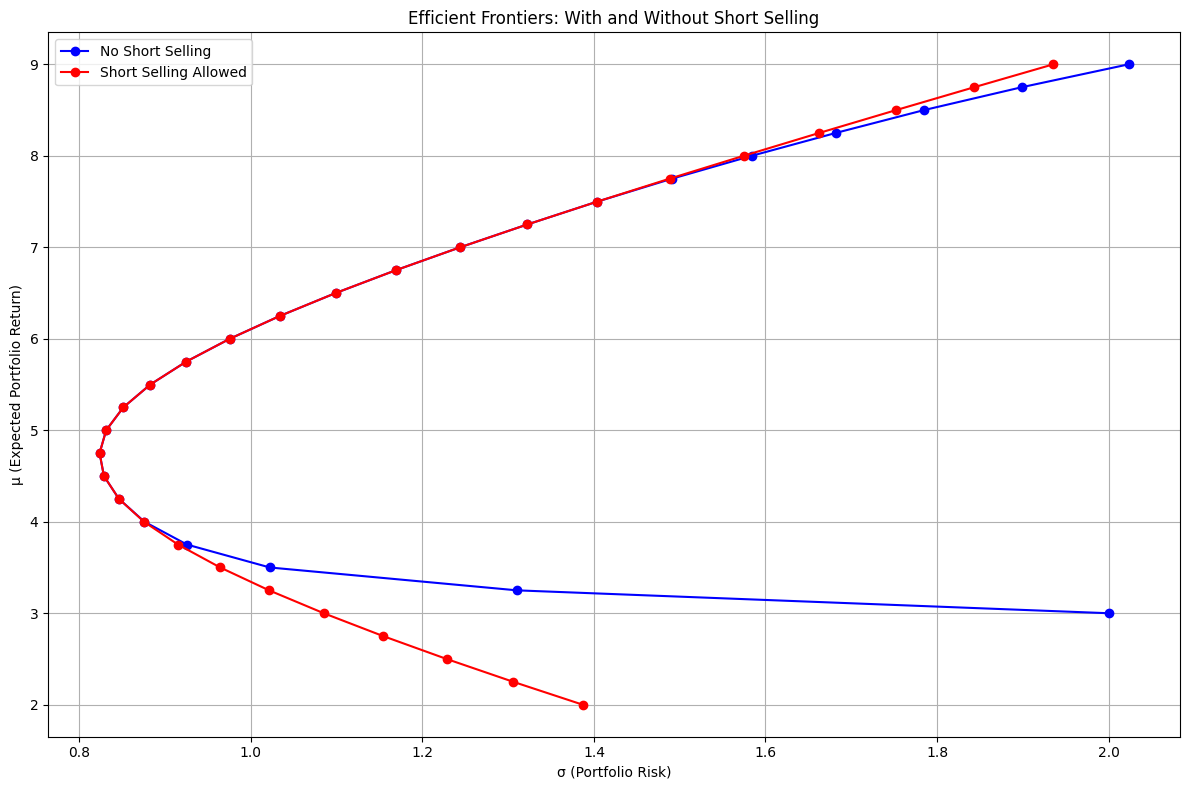

No Short Selling σ values: [1.9999999999996432, 1.3104486945509999, 1.022063423394682, 0.9255649509538327, 0.8758282585748574, 0.8460796662223544, 0.8285826430950536, 0.823543999397893, 0.8311903326636969, 0.8511798558155415, 0.8826743750908133, 0.9244988294210843, 0.9753252003425144, 1.0338266464492858, 1.0987779352795537, 1.1691045696895699, 1.243895158903708, 1.322392515663478, 1.4040099471527132, 1.4909296868607123, 1.583890160268924, 1.6818896900453084, 1.784885082718667, 1.898811502790026, 2.023343769431494]
No Short Selling μ values: [3.0, 3.250000000000173, 3.5000000000008082, 3.7500000000151537, 3.9999999999984412, 4.2500000000003535, 4.499999999999918, 4.749999999999945, 4.999999999999982, 5.2500000000000115, 5.50000000000001, 5.749999999999991, 6.000000000000001, 6.250000000000004, 6.499999999999998, 6.750000000000004, 7.000000000000011, 7.24999999999987, 7.499999999996389, 7.749999999999445, 8.000000000000062, 8.25000000000028, 8.50000000000064, 8.749999999999927, 8.9999999

In [9]:
import numpy as np
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# ... [Keep the previous data generation code] ...

def optimize_portfolio(returns, cov_matrix, target_return, allow_short_selling=False):
    n = len(returns)
    model = gp.Model("Portfolio Optimization")
    model.setParam('OutputFlag', 0)

    if allow_short_selling:
        x = model.addVars(n, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="x")
    else:
        x = model.addVars(n, lb=0, name="x")

    obj = gp.QuadExpr()
    for i in range(n):
        for j in range(n):
            obj += x[i] * x[j] * cov_matrix[i, j]
    model.setObjective(obj, GRB.MINIMIZE)

    model.addConstr(gp.quicksum(returns[i] * x[i] for i in range(n)) == target_return, "return")
    model.addConstr(gp.quicksum(x[i] for i in range(n)) == 1, "investment")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        return [x[i].x for i in range(n)], model.objVal
    else:
        return None, None

# Generate efficient frontiers for both cases
r_values = np.arange(2.00, 9.25, 0.25)
sigma_values_no_short = []
mu_values_no_short = []
sigma_values_short = []
mu_values_short = []

for r in r_values:
    # No short selling (original)
    weights_no_short, risk_no_short = optimize_portfolio(mmu.flatten(), C, r, False)
    if weights_no_short is not None:
        sigma_no_short = np.sqrt(risk_no_short)
        mu_no_short = np.dot(mmu.flatten(), weights_no_short)
        sigma_values_no_short.append(sigma_no_short)
        mu_values_no_short.append(mu_no_short)

    # Short selling allowed
    weights_short, risk_short = optimize_portfolio(mmu.flatten(), C, r, True)
    if weights_short is not None:
        sigma_short = np.sqrt(risk_short)
        mu_short = np.dot(mmu.flatten(), weights_short)
        sigma_values_short.append(sigma_short)
        mu_values_short.append(mu_short)

# Plot both efficient frontiers
plt.figure(figsize=(12, 8))
plt.plot(sigma_values_no_short, mu_values_no_short, 'b-o', label='No Short Selling')
plt.plot(sigma_values_short, mu_values_short, 'r-o', label='Short Selling Allowed')

plt.xlabel('σ (Portfolio Risk)')
plt.ylabel('μ (Expected Portfolio Return)')
plt.title('Efficient Frontiers: With and Without Short Selling')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("No Short Selling σ values:", sigma_values_no_short)
print("No Short Selling μ values:", mu_values_no_short)
print("\nShort Selling Allowed σ values:", sigma_values_short)
print("Short Selling Allowed μ values:", mu_values_short)